# 第四章：变换三维对象

注意：本章的大多数示例代码位于本目录下的其他 .py 文件中，而不是直接写在这个 Notebook 里。你可以在 Notebook 中运行这些外部文件，运行后会弹出一个 PyGame 窗口。
例如，输入命令：

In [2]:
import sys
!{sys.executable} -m pip install pygame PyOpenGL PyOpenGL_accelerate Pillow

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.3/10.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/10.6 MB 2.8 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/10.6 MB 3.4 MB/s eta 0:00:03
   --------- ------------------------------ 2.6/10.6 MB 3.5 MB/s eta 0:00:03
   ------------ --------------------------- 3.4/10.6 MB 3.7 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/10.6 MB 3.6 MB/s eta 0:00:02
   ------------------- -------------------- 5.2/10.6 MB 3.8 MB/s eta 0:00:02
   ---------------------- ----------------- 6.0/10.6 MB 3.9 MB/s eta 0:00:02
   --------------------------- ------------ 7.3/10.6 MB 4.0 MB/s eta 0:00:01
   -------------------------------- ------- 8.7/10.6 MB 4.3 MB/s eta 0:00:01
   ----------------

验证安装是否成功

## 4.1 变换三维对象

### 4.1.1 绘制变换后的对象

In [1]:
# P105页 伪代码
def transform(v):
    old_x, old_y, old_z = v
    # 这里做了一些处理
    return (new_x, new_y, new_z)

In [10]:
!python draw_teapot.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
!python scale_teapot.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
!python scale_translate_teapot.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 4.1.2 组合向量变换

In [5]:
def compose(f1,f2):
    def new_function(input):
        return f1(f2(input))
    return new_function

In [6]:
def polygon_map(transformation, polygons):
    return [
        [transformation(vertex) for vertex in triangle] for triangle in polygons
    ]

In [6]:
def scale_by(scalar):
    def new_function(v):
        return scale(scalar, v)
    return new_function

### 4.1.3 绕轴旋转对象

In [7]:
!python rotate_teapot.py

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [7]:
!python rotate_teapot.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [8]:
def rotate_x(angle, vector):
    x,y,z = vector
    new_y, new_z = rotate2d(angle, (y,z))
    return x, new_y, new_z

def rotate_x_by(angle):
    def new_function(v):
        return rotate_x(angle,v)
    return new_function

In [11]:
!python rotate_teapot_x.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 4.1.4 创造属于你自己的几何变换

In [1]:
def stretch_x(vector):
    x,y,z = vector
    return (4.*x, y, z)

In [2]:
!python stretch_teapot.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
!python stretch_teapot_y.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
!python cube_teapot.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [5]:
def slant_xy(vector):
    x,y,z = vector
    return (x+y, y, z)

In [6]:
!python slant_teapot.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 4.1.5 练习

#### **练习4.1** 实现一个translate_by函数（4.1.2节中有所提及），以一个平移向量作为输入并返回一个平移函数作为输出。

In [8]:
def translate_by(vector):
    def new_function(v):
        x,y=vector[0], vector[1]
        return (x*v, y*v)
    return new_function

a = translate_by((3,4))(5)
a

(15, 20)

In [9]:
def translate_by(translation):
    def new_function(v):
        return add(translation, v)
    return new_function

#### **练习4.2** 渲染沿z轴负方向平移了20个单位的茶壶，产生的图像是什么样的？

In [12]:
!python translate_teapot_x_-20.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


#### **练习4.3（小项目）** 当按0和1之间的标量缩放每一个向量时，茶壶会发生什么变化？按系数-1缩放，又会发生什么变化？

In [13]:
!python scale_teapot_0.5.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [14]:
!python scale_teapot_-1.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


#### **练习4.4** 对茶壶首先应用translate1left，然后应用scale2。结果与相反的组合顺序有什么不同？为什么会这样？

先translate1left然后scale2

In [17]:
!python translate_scale_teapot.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


先scale2然后translate1left

In [18]:
!python scale_translate_teapot.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


#### **练习4.5** compose(scale_by(0.4), scale_by(1.5))变换的效果是什么？

In [21]:
!python scale_teapot_1.5_0.4.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


解：把一个向量依次按系数1.5和0.4进行缩放，净缩放系数为0.6。得到的图像将是原始大小的60%。

#### **练习4.6** 将compose(f,g)函数修改为compose(*args)，它将几个函数作为参数，并返回一个新的函数，即它们的组合。

In [22]:
def compose(*args):
    def new_function(input): #1
        state = input #2
        for f in reversed(args): #3
            state = f(state) #4
        return state
    return new_function

In [23]:
def prepend(string):
    def new_function(input):
        return string + input
    return new_function

f = compose(prepend("P"), prepend("y"), prepend("t"))

In [24]:
f("hon")

'Python'

#### **练习4.7** 实现函数curry2(f)，接收一个有两个参数的Python函数f(x,y)，并返回一个柯里化版本。例如，对于g =curry2(f)，f(x,y)和g(x)(y)应该返回相同的结果。

In [30]:
from vectors import scale
def curry2(f):
    def g(x):
        def new_function(y):
            return f(x, y)
        return new_function
    return g

scale_by=curry2(scale)
scale_by(2)((1,2,3))

(2, 4, 6)

#### **练习4.8** 在不执行代码的情况下，说出变换compose(rotate_z_by(pi/2),rotate_x_by(pi/2))的结果是什么。如果换一下组合的顺序呢？

这里如果绕x轴旋转，那么指的是向屏幕外转

先绕x轴旋转90度，茶壶顶朝向自己，然后绕z轴旋转90度，茶壶顶朝自己，茶壶嘴朝上

调换顺序为compose(rotate_x_by(pi/2)，rotate_z_by(pi/2))

先绕z轴旋转90度，茶壶侧面朝自己，茶壶嘴朝上，然后绕x轴旋转90度，茶壶把手那一侧朝向自己

以下代码为绕x轴旋转90度之后的效果

In [4]:
!python rotate_teapot_x_90.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


在绕z轴旋转90度

In [6]:
!python rotate_teapot_x_90_z_90.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


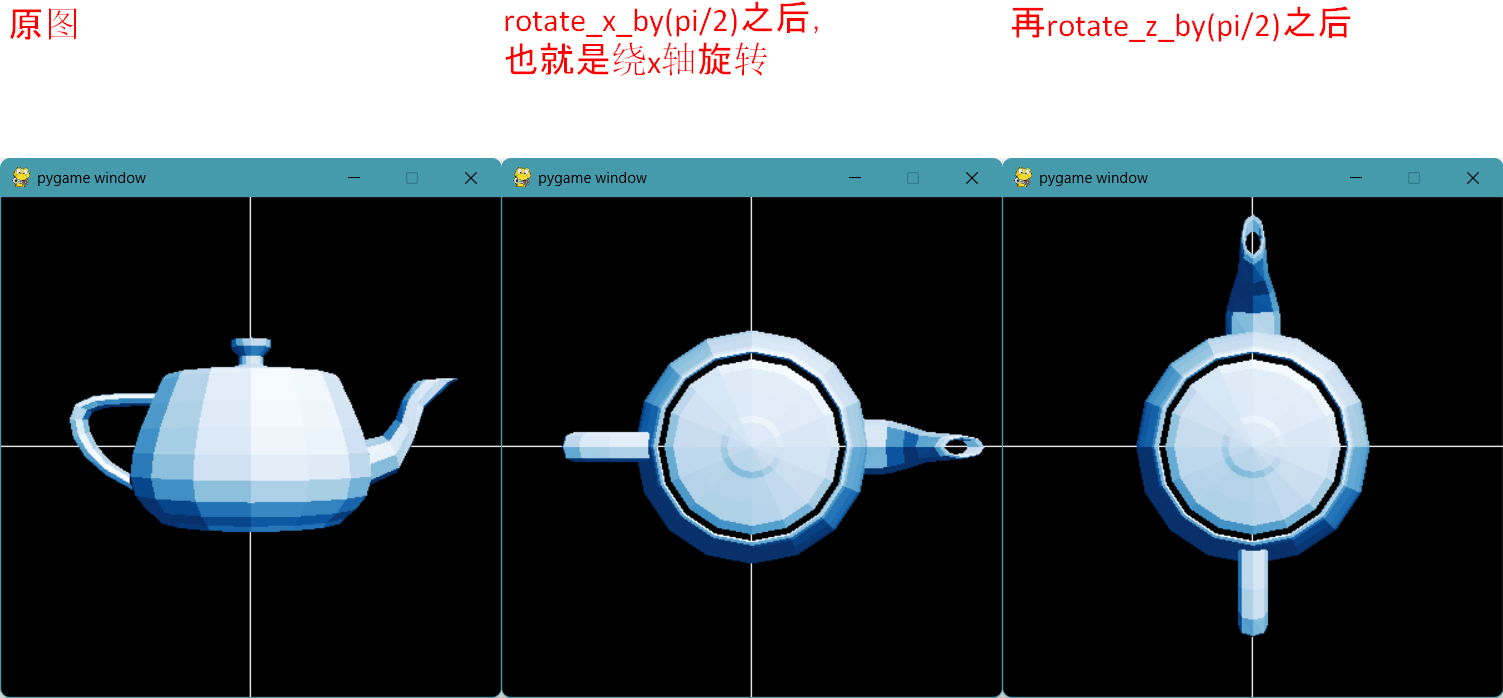

书中答案给"这个组合相当于绕轴顺时针旋转π/2弧度。"是不对的

In [8]:
!python rotate_teapot_y_90.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


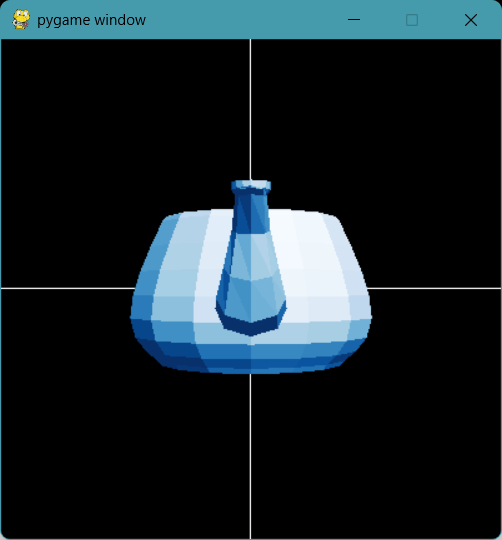

交换顺序

以下代码为绕z轴旋转90度之后的效果

In [9]:
!python rotate_teapot_z_90.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


再绕x轴旋转90度

In [12]:
!python rotate_teapot_z_90_x_90.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


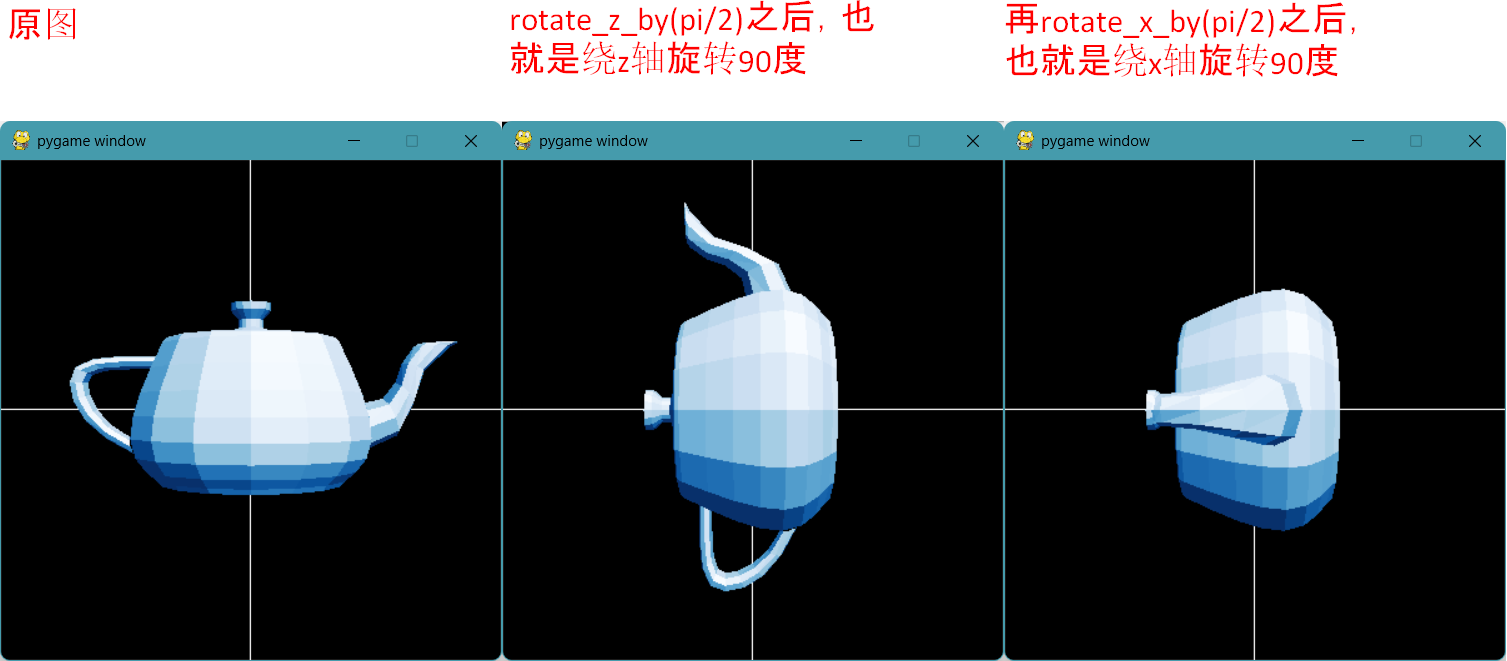

颠倒顺序之后，数中给出的答案：“颠倒顺序，则是绕y轴逆时针旋转π/2弧度。”也是不对的

In [13]:
!python rotate_teapot_y_-90.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


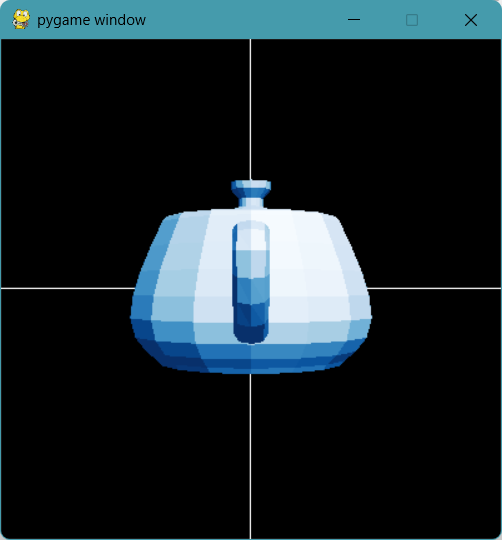

#### **练习4.9** 实现函数stretch_x(scalar,vector)，只在方向上将目标向量按给定系数缩放。同时实现stretch_x_by的柯里化版本，使stretch_x_by(scalar)(vector)返回同样的结果。

In [25]:
def stretch_x(scalar,vector):
    x,y,z = vector
    return (scalar*x, y, z)

In [26]:
def stretch_x_by(scalar):
    def new_function(vector):
        return stretch_x(scalar,vector)
    return new_function


In [27]:
stretch_x(5,(1,2,3))

(5, 2, 3)

In [28]:
stretch_x_by(5)((1,2,3))

(5, 2, 3)

In [14]:
!python stretch_teapot.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


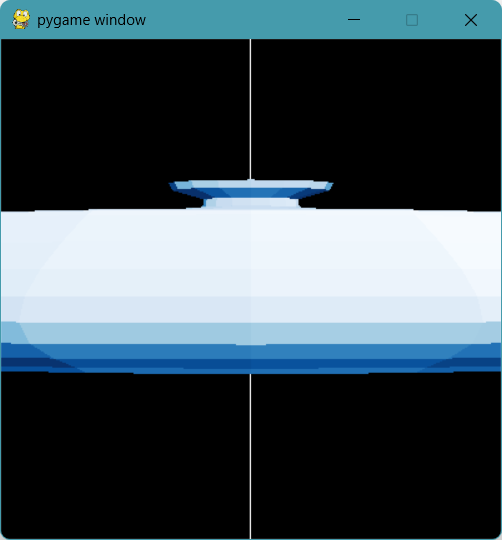

## 4.2 线性变换

### 4.2.1 向量运算的不变性

本节没有代码

### 4.2.2 图解线性变换

## 4.2.3 Why linear transformations?

## 4.2.4 Computing linear transformations

In [29]:
from vectors import add,scale

In [30]:
Ae1 = (1,1,1) #1
Ae2 = (1,0,-1)
Ae3 = (0,1,1)

def apply_A(v): #2
    return add( #3
        scale(v[0], Ae1),
        scale(v[1], Ae2),
        scale(v[2], Ae3)
    )

In [31]:
!python linear_transform_teapot.py

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


## 4.2.5 Exercises

**Exercise:** Write a `linear_combination(scalars, *vectors)` that takes a list of scalars and the same number of vectors and returns a single vector. For example, 

`linear_combination([1,2,3], (1,0,0), (0,1,0), (0,0,1))` 

should return $$1 \cdot (1,0,0) + 2 \cdot (0,1,0) + 3 \cdot (0,0,1) = (1,2,3).$$

In [32]:
from vectors import *
def linear_combination(scalars,*vectors):
    scaled = [scale(s,v) for s,v in zip(scalars,vectors)]
    return add(*scaled)

In [33]:
linear_combination([1,2,3], (1,0,0), (0,1,0), (0,0,1))

(1, 2, 3)

**Exercise:** Write a function `transform_standard_basis(transform)` that takes a 3D vector transformation as an input and outputs the effect it has on the standard basis: it should output a tuple of 3 vectors that are the results of transform acting on $e_1$, $e_2$, and $e_3$, respectively.

In [34]:
def transform_standard_basis(transform):
    return transform((1,0,0)), transform((0,1,0)), transform((0,0,1))

In [35]:
from math import *

In [36]:
transform_standard_basis(rotate_x_by(pi/2))

((1, 0.0, 0.0),
 (0, 6.123233995736766e-17, 1.0),
 (0, -1.0, 1.2246467991473532e-16))